# Model training

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load the preprocessed dataset from a file

In [2]:
df = pd.read_csv('processed_dataset_v2.csv')

df.head(100)

,match_id,has_team_won,team_q_mmr_diff_sum,team_heroes_winrate_overall_mean,team_heroes_total_matches_played_sum,team_players_dire_winrate_all_time_mean,team_players_dire_games_played_all_time_mean,team_players_radiant_winrate_all_time_mean,team_players_radiant_games_played_all_time_mean,team_heroes_pick_confidence_score_allies_sum,...,team_players_net_sum,team_players_assists_number_sum,team_player_deaths_number_sum,team_players_kills_number_sum,team_hero_lvls_mean,team_players_kda_average_all_matches_mean,team_heroes_pickrate_average_mean,team_heroes_winrate_average_mean,team_heroes_pickrate_for_rank_mean,team_heroes_winrate_for_rank_mean
0,7393031014,True,1147,10.985433,993,-1.498229,1528.0,-0.830002,1409.4,-8,...,42138,84,-30,32,4.4,-0.475690,4.914816,1.816724,4.16994,1.62654
1,7393139706,True,1078,0.301894,191,-3.485422,812.8,-2.778400,754.6,4,...,25677,28,-7,6,1.0,-1.285879,2.560724,0.982756,1.31134,1.40456
2,7393178003,True,308,5.750341,131,2.017350,-1255.2,1.295491,-1291.0,0,...,25173,0,-3,2,0.4,0.506771,-3.103768,1.648532,-3.93056,1.33496
3,7393196807,False,-616,3.685672,862,-2.027335,2763.4,0.516487,2767.6,-2,...,-29915,-57,28,-30,-3.8,0.141931,-4.398308,2.334400,-3.72034,2.20772
4,7393211000,True,-2310,6.930735,-125,-1.872473,451.8,-3.235953,443.0,4,...,29481,47,-22,21,3.2,0.035616,3.331552,0.007632,3.41668,0.29068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,7396316304,False,462,-4.222075,-1367,-0.365135,-1313.6,0.527145,-1292.2,-1,...,-19851,-38,14,-14,-1.2,0.504032,-11.678064,-1.007220,-12.35062,-1.48172
96,7396372612,True,2156,-3.469427,469,-1.137536,1179.6,-0.673219,1117.6,2,...,27642,35,-18,20,3.2,-0.122759,8.310840,1.965820,8.32326,2.23032
97,7396397000,True,0,6.839175,434,-2.383550,137.6,-0.515876,151.8,4,...,40737,52,-39,40,5.8,0.063747,2.338116,0.230156,4.15912,0.93456
98,7396456900,False,-2002,-8.237282,-290,-1.687376,496.2,-0.943863,442.4,1,...,-31333,-17,14,-11,-3.6,0.373652,1.394216,-2.138508,0.30376,-2.73920


In [3]:
df.describe()

,match_id,team_q_mmr_diff_sum,team_heroes_winrate_overall_mean,team_heroes_total_matches_played_sum,team_players_dire_winrate_all_time_mean,team_players_dire_games_played_all_time_mean,team_players_radiant_winrate_all_time_mean,team_players_radiant_games_played_all_time_mean,team_heroes_pick_confidence_score_allies_sum,team_heroes_pick_confidence_score_enemies_sum,...,team_players_net_sum,team_players_assists_number_sum,team_player_deaths_number_sum,team_players_kills_number_sum,team_hero_lvls_mean,team_players_kda_average_all_matches_mean,team_heroes_pickrate_average_mean,team_heroes_winrate_average_mean,team_heroes_pickrate_for_rank_mean,team_heroes_winrate_for_rank_mean
count,9.774000e+03,9774.00000,9.774000e+03,9774.000000,9.774000e+03,9.774000e+03,9.774000e+03,9.774000e+03,9774.000000,9774.000000,...,9774.000000,9774.000000,9774.000000,9774.00000,9.774000e+03,9.774000e+03,9.774000e+03,9.774000e+03,9.774000e+03,9774.000000
mean,7.515583e+09,0.00000,-1.163156e-17,0.000000,-1.453945e-18,-1.302734e-15,7.269723e-19,-1.488839e-15,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,-5.088806e-18,-1.817431e-19,-8.723668e-18,3.634862e-19,8.723668e-18,0.000000
std,7.557382e+07,1644.21887,9.193921e+00,701.696607,1.867837e+00,8.242200e+02,1.957257e+00,8.224688e+02,4.323414,3.015971,...,29839.417917,44.859591,19.980093,20.32692,3.058363e+00,4.120951e-01,3.324290e+00,1.396422e+00,3.707076e+00,1.659326
min,7.393031e+09,-7392.00000,-4.102612e+01,-6688.000000,-1.136144e+01,-4.215600e+03,-1.177328e+01,-4.236400e+03,-14.000000,-10.000000,...,-76797.000000,-146.000000,-60.000000,-60.00000,-7.600000e+00,-4.219236e+00,-1.167806e+01,-5.302040e+00,-1.330644e+01,-6.250360
25%,7.465667e+09,-1078.00000,-5.780160e+00,-267.000000,-1.092114e+00,-5.173500e+02,-1.177932e+00,-5.189000e+02,-3.000000,-2.000000,...,-28457.750000,-37.000000,-17.000000,-17.00000,-2.800000e+00,-2.565856e-01,-2.282755e+00,-9.353150e-01,-2.515520e+00,-1.101295
50%,7.501857e+09,0.00000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
75%,7.581143e+09,1078.00000,5.780160e+00,267.000000,1.092114e+00,5.173500e+02,1.177932e+00,5.189000e+02,3.000000,2.000000,...,28457.750000,37.000000,17.000000,17.00000,2.800000e+00,2.565856e-01,2.282755e+00,9.353150e-01,2.515520e+00,1.101295
max,7.672827e+09,7392.00000,4.102612e+01,6688.000000,1.136144e+01,4.215600e+03,1.177328e+01,4.236400e+03,14.000000,10.000000,...,76797.000000,146.000000,60.000000,60.00000,7.600000e+00,4.219236e+00,1.167806e+01,5.302040e+00,1.330644e+01,6.250360


### Drop all the irrelevant columns (in-game data, ids, etc)

In [4]:
columns_to_drop = ['match_id', 'team_players_xpm_sum', 'team_players_gpm_sum', 'team_players_denies_sum', 'team_players_lasthits_sum', 'team_players_net_sum', 
                   'team_players_assists_number_sum', 'team_player_deaths_number_sum', 'team_players_kills_number_sum','team_hero_lvls_mean']

df = df.drop(columns=columns_to_drop)

df.columns

Index(['has_team_won', 'team_q_mmr_diff_sum',
       'team_heroes_winrate_overall_mean',
       'team_heroes_total_matches_played_sum',
       'team_players_dire_winrate_all_time_mean',
       'team_players_dire_games_played_all_time_mean',
       'team_players_radiant_winrate_all_time_mean',
       'team_players_radiant_games_played_all_time_mean',
       'team_heroes_pick_confidence_score_allies_sum',
       'team_heroes_pick_confidence_score_enemies_sum',
       'team_heroes_pick_confidence_score_total_sum',
       'team_players__time_played_all_matches_mean',
       'team_players_winrate_over_time_mean',
       'team_players_all_matches_played_number_mean',
       'team_players_matches_abandonment_rate_mean',
       'team_players_matches_lost_mean', 'team_players_matches_won_mean',
       'team_players_match_rank_initial_mmr_mean',
       'team_players_kda_average_all_matches_mean',
       'team_heroes_pickrate_average_mean', 'team_heroes_winrate_average_mean',
       'team_heroes_

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9774 entries, 0 to 9773
Data columns (total 23 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   has_team_won                                     9774 non-null   bool   
 1   team_q_mmr_diff_sum                              9774 non-null   int64  
 2   team_heroes_winrate_overall_mean                 9774 non-null   float64
 3   team_heroes_total_matches_played_sum             9774 non-null   int64  
 4   team_players_dire_winrate_all_time_mean          9774 non-null   float64
 5   team_players_dire_games_played_all_time_mean     9774 non-null   float64
 6   team_players_radiant_winrate_all_time_mean       9774 non-null   float64
 7   team_players_radiant_games_played_all_time_mean  9774 non-null   float64
 8   team_heroes_pick_confidence_score_allies_sum     9774 non-null   int64  
 9   team_heroes_pick_confidence_sc

### Data visualisation

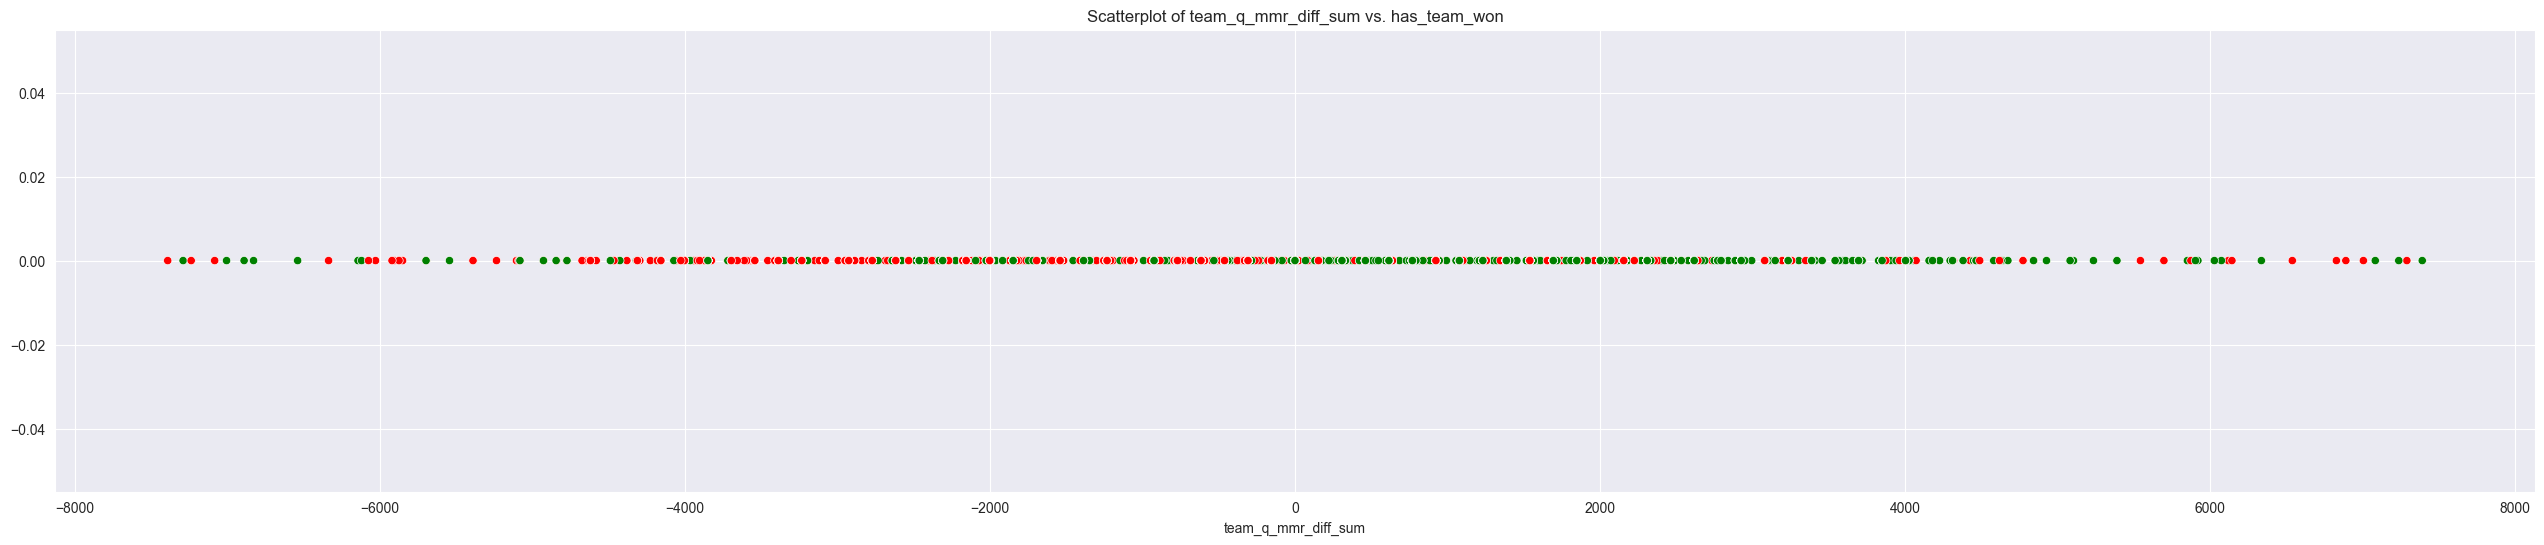

In [6]:
colors = {0: 'red', 1: 'green'}  # 0 for loss, 1 for win

df['dummy'] = 0

plt.figure(figsize=(32, 6))
sns.scatterplot(x='team_q_mmr_diff_sum', y='dummy', hue='has_team_won', palette=colors, data=df, legend=None)

plt.xlabel('team_q_mmr_diff_sum')
plt.ylabel('')
plt.title('Scatterplot of team_q_mmr_diff_sum vs. has_team_won')

plt.show()

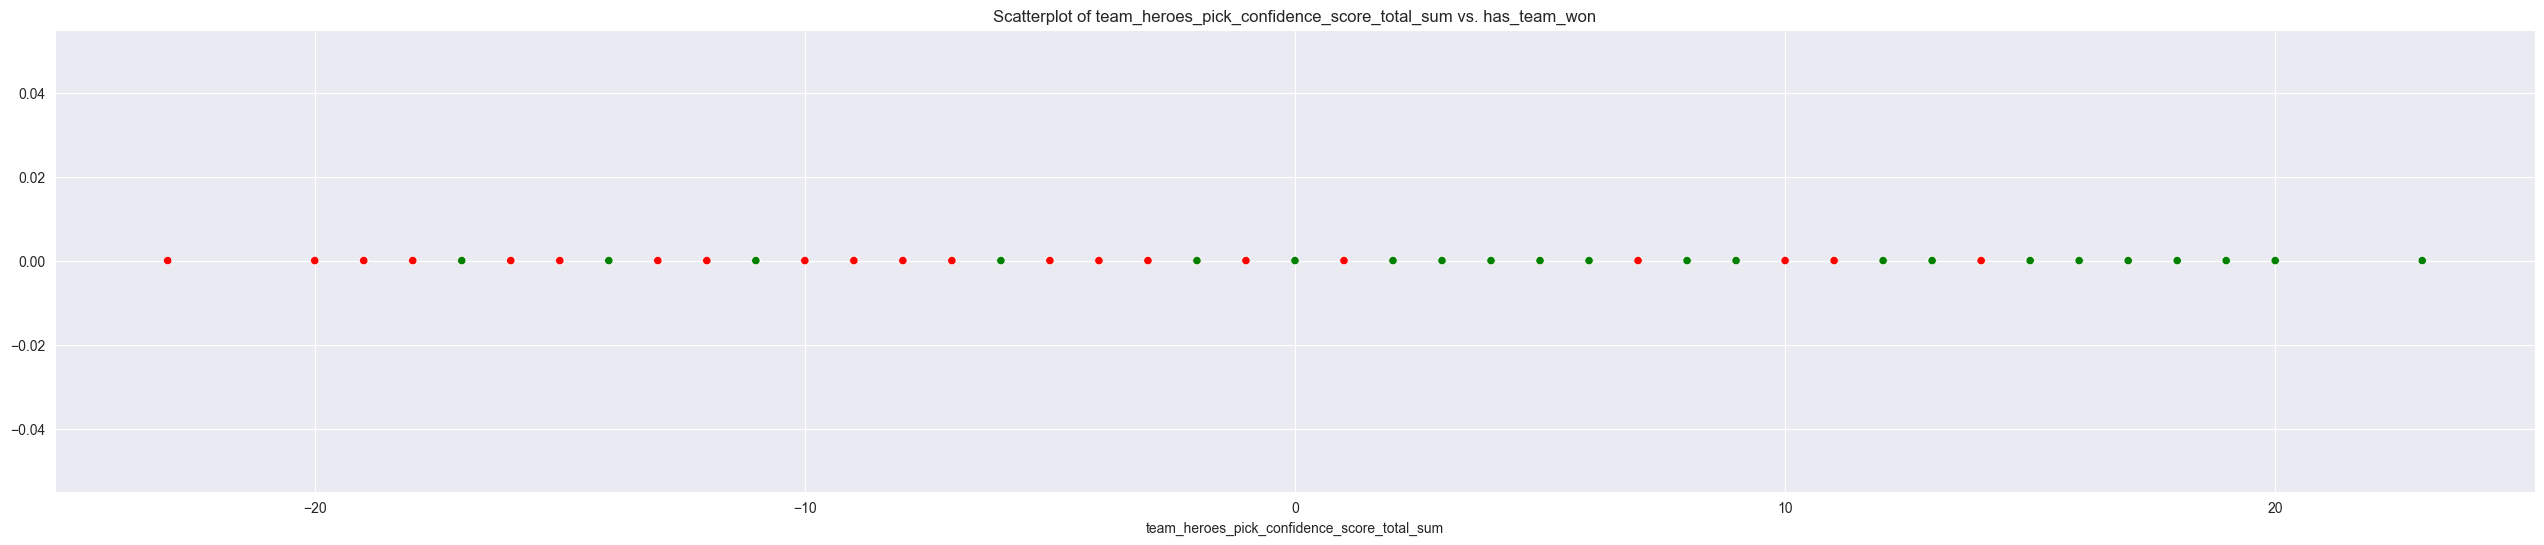

In [7]:
colors = {0: 'red', 1: 'green'}  # 0 for loss, 1 for win

feature = 'team_heroes_pick_confidence_score_total_sum'

df['dummy'] = 0

plt.figure(figsize=(32, 6))
sns.scatterplot(x=feature, y='dummy', hue='has_team_won', palette=colors, data=df, legend=None)

plt.xlabel(feature)
plt.ylabel('')
plt.title(f'Scatterplot of {feature} vs. has_team_won')

plt.show()

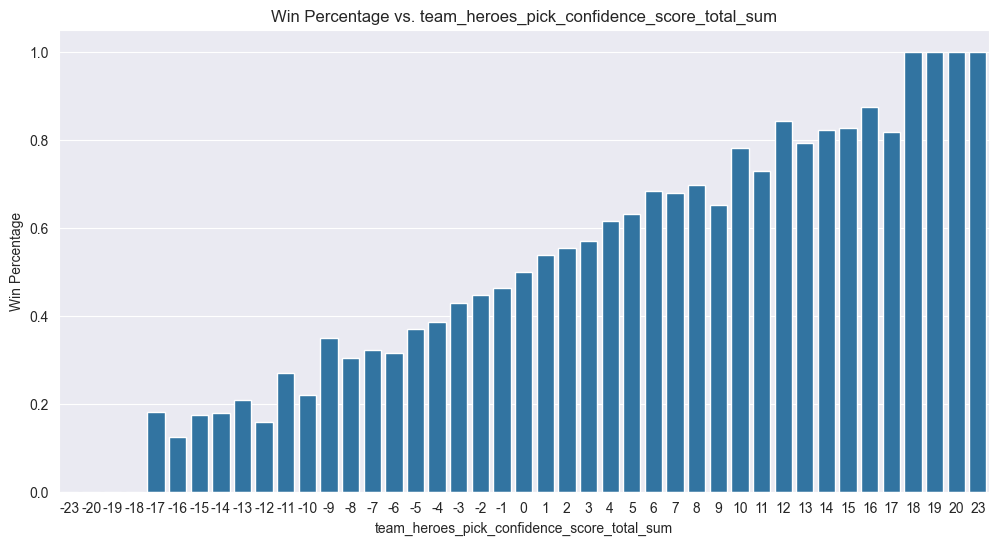

In [8]:
feature = 'team_heroes_pick_confidence_score_total_sum'

plt.figure(figsize=(12, 6))
sns.barplot(x=feature, y='has_team_won', data=df, errorbar=None)
plt.xlabel(f'{feature}')
plt.ylabel('Win Percentage')
plt.title(f'Win Percentage vs. {feature}')
plt.show()

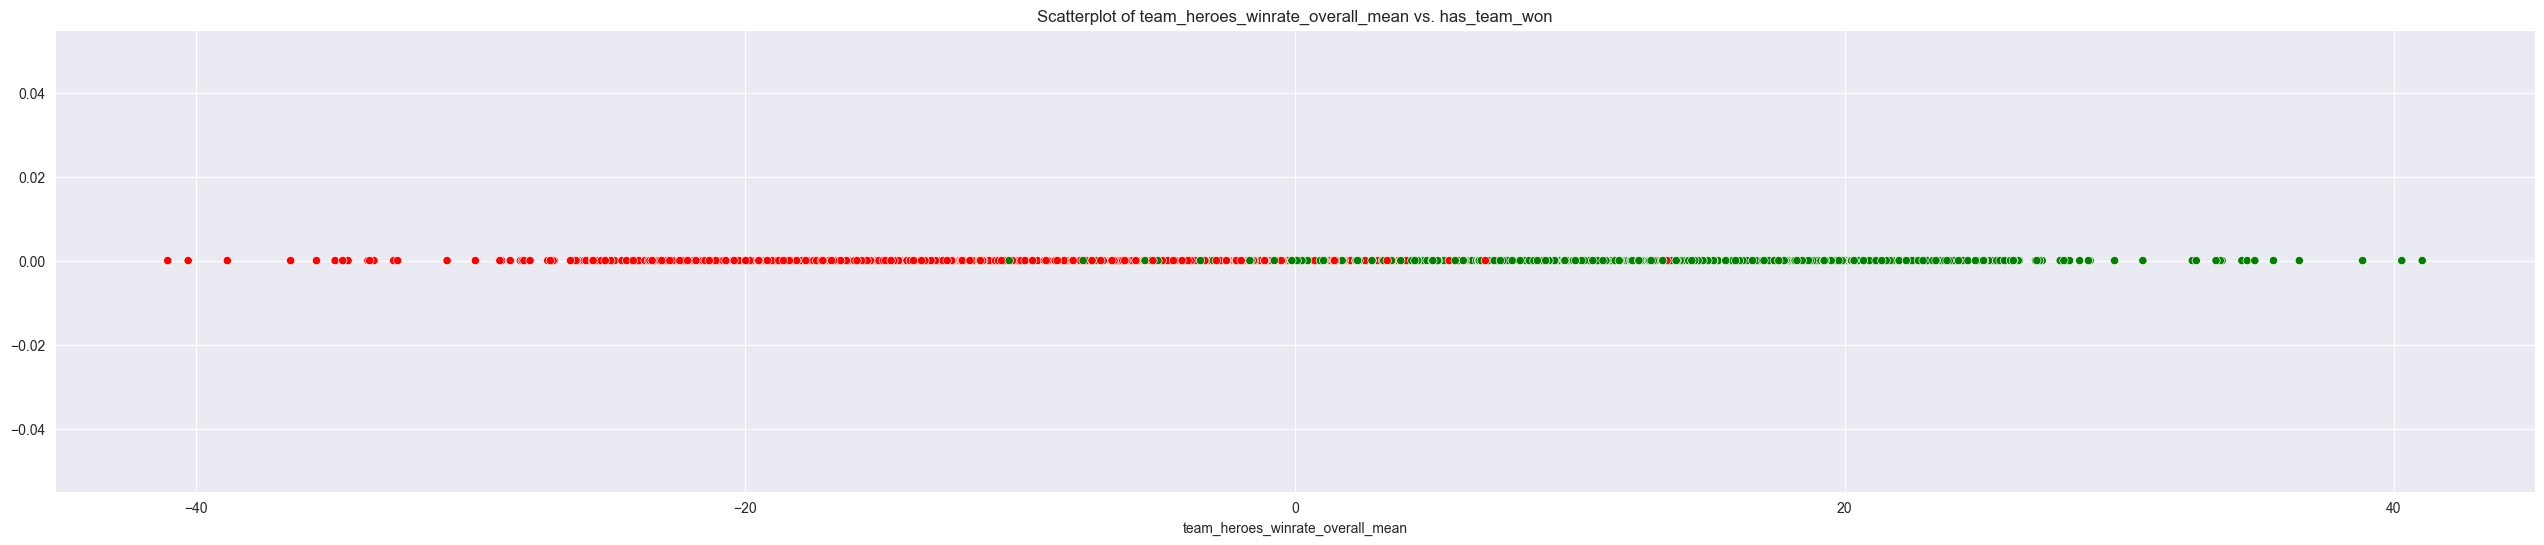

In [9]:
colors = {0: 'red', 1: 'green'}  # 0 for loss, 1 for win

feature = 'team_heroes_winrate_overall_mean'

df['dummy'] = 0

plt.figure(figsize=(32, 6))
sns.scatterplot(x=feature, y='dummy', hue='has_team_won', palette=colors, data=df, legend=None)

plt.xlabel(feature)
plt.ylabel('')
plt.title(f'Scatterplot of {feature} vs. has_team_won')

plt.show()

From the plots above we can clearly see that dataset obtained data-relations (and quite the promising ones as well) after all the processing and aggregations

### Prepare the data for training

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split

X = df.drop(columns=['has_team_won', 'dummy'])
y = df['has_team_won']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (7819, 22)
Shape of X_test: (1955, 22)
Shape of y_train: (7819,)
Shape of y_test: (1955,)


In [11]:
X.head(10)

,team_q_mmr_diff_sum,team_heroes_winrate_overall_mean,team_heroes_total_matches_played_sum,team_players_dire_winrate_all_time_mean,team_players_dire_games_played_all_time_mean,team_players_radiant_winrate_all_time_mean,team_players_radiant_games_played_all_time_mean,team_heroes_pick_confidence_score_allies_sum,team_heroes_pick_confidence_score_enemies_sum,team_heroes_pick_confidence_score_total_sum,...,team_players_all_matches_played_number_mean,team_players_matches_abandonment_rate_mean,team_players_matches_lost_mean,team_players_matches_won_mean,team_players_match_rank_initial_mmr_mean,team_players_kda_average_all_matches_mean,team_heroes_pickrate_average_mean,team_heroes_winrate_average_mean,team_heroes_pickrate_for_rank_mean,team_heroes_winrate_for_rank_mean
0,1147,10.985433,993,-1.498229,1528.0,-0.830002,1409.4,-8,-3,-11,...,596.6,4.392295,305.8,290.8,229.4,-0.475690,4.914816,1.816724,4.16994,1.62654
1,1078,0.301894,191,-3.485422,812.8,-2.778400,754.6,4,1,5,...,1411.4,-0.571170,758.0,653.4,215.6,-1.285879,2.560724,0.982756,1.31134,1.40456
2,308,5.750341,131,2.017350,-1255.2,1.295491,-1291.0,0,10,10,...,-675.4,-2.515355,-341.0,-334.4,61.6,0.506771,-3.103768,1.648532,-3.93056,1.33496
3,-616,3.685672,862,-2.027335,2763.4,0.516487,2767.6,-2,6,4,...,4152.4,0.098363,2054.0,2098.4,-123.2,0.141931,-4.398308,2.334400,-3.72034,2.20772
4,-2310,6.930735,-125,-1.872473,451.8,-3.235953,443.0,4,-1,3,...,229.2,1.451957,155.4,73.8,-462.0,0.035616,3.331552,0.007632,3.41668,0.29068
5,-1848,-17.122664,-550,0.230736,-266.6,-0.760767,-259.2,5,-3,2,...,-504.2,-0.942566,-220.2,-284.0,-369.6,0.498322,3.060500,-0.826844,3.36810,-0.97776
6,-616,-0.273552,-331,1.884795,-1913.0,1.260623,-1897.8,-5,1,-4,...,-2234.6,1.902371,-1142.0,-1092.6,-123.2,0.159909,-7.553596,0.868612,-7.97700,1.07106
7,-308,7.079083,-208,-3.618822,1106.6,-1.431606,1108.0,-1,0,-1,...,1134.2,0.956069,599.2,535.0,-61.6,-0.960422,-4.417176,1.012380,-4.27788,1.09684
8,-2310,13.319439,34,0.190801,243.2,-1.949353,191.6,1,2,3,...,424.8,0.250546,222.4,202.4,-462.0,-0.183712,-3.779732,1.309988,-1.95162,2.00738
9,-308,-5.800618,-766,0.757684,169.0,1.174380,174.0,-3,-3,-6,...,1105.2,0.070867,531.8,573.4,-61.6,0.024588,-5.185940,-0.234672,-4.82374,-0.20616


### Train the RandomForest model

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf_model = RandomForestClassifier(n_estimators=122, random_state=42)

rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=122, random_state=42)

### Test the RandomForest model

In [13]:
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.7964194373401534
Classification Report:
              precision    recall  f1-score   support

       False       0.78      0.82      0.80       969
        True       0.81      0.78      0.79       986

    accuracy                           0.80      1955
   macro avg       0.80      0.80      0.80      1955
weighted avg       0.80      0.80      0.80      1955


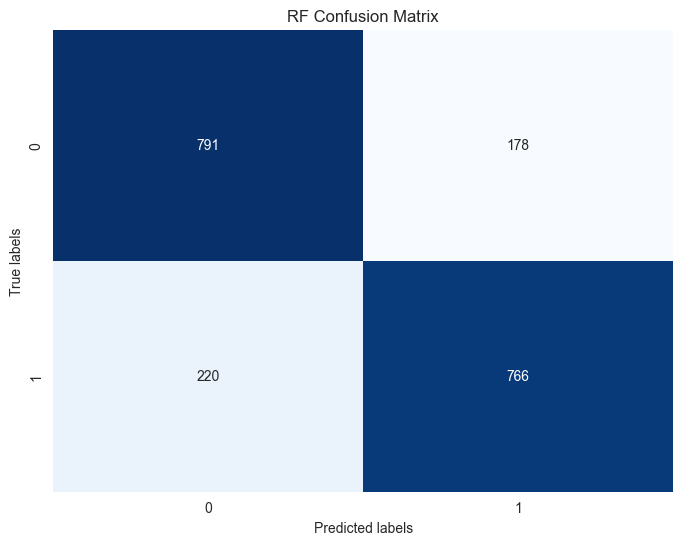

In [14]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('RF Confusion Matrix')
plt.show()

### Inspect the most important RF features

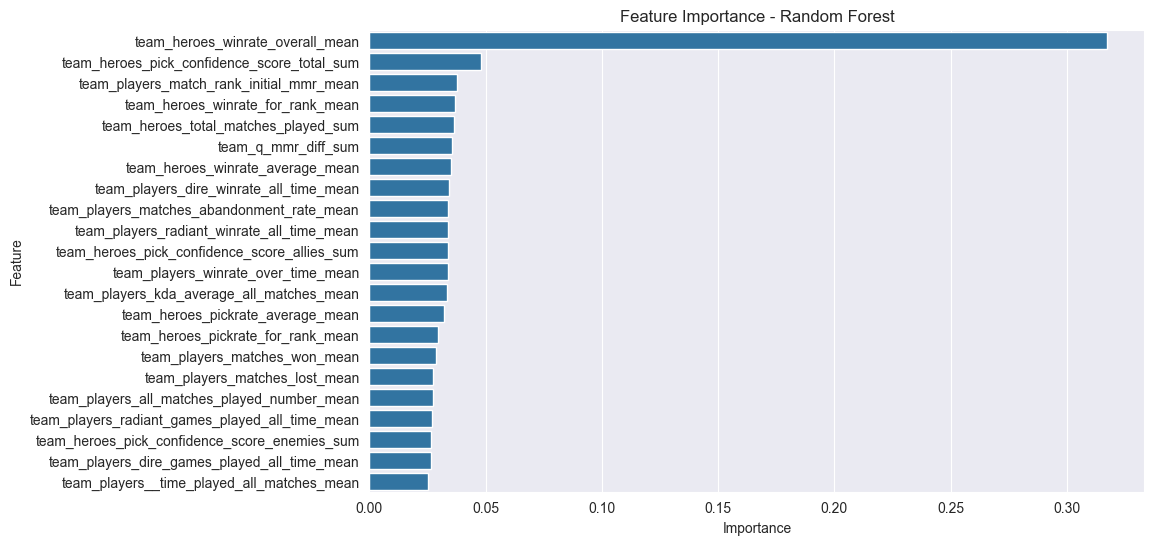

In [15]:
feature_importances = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance - Random Forest')
plt.show()

### Train the LogisticRegression model

Note: we use data standardization to improve algorithm's convergence

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

### Test the LogisticRegression model

In [17]:
y_pred = pipe.predict(X_test)

print('Accuracy: ', pipe.score(X_test, y_test))
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy:  0.80153452685422
Classification Report:
              precision    recall  f1-score   support

       False       0.79      0.81      0.80       969
        True       0.81      0.79      0.80       986

    accuracy                           0.80      1955
   macro avg       0.80      0.80      0.80      1955
weighted avg       0.80      0.80      0.80      1955


### Models' performance graphs

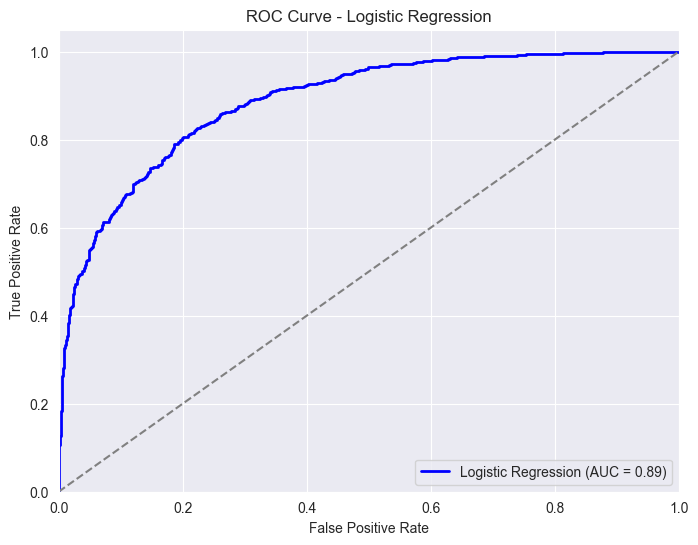

In [18]:
from sklearn.metrics import roc_curve, auc

y_pred_proba_lr = pipe.predict_proba(X_test)[:,1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_proba_lr)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='b', lw=2, label='Logistic Regression (AUC = %0.2f)' % auc(fpr_lr, tpr_lr))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.show()

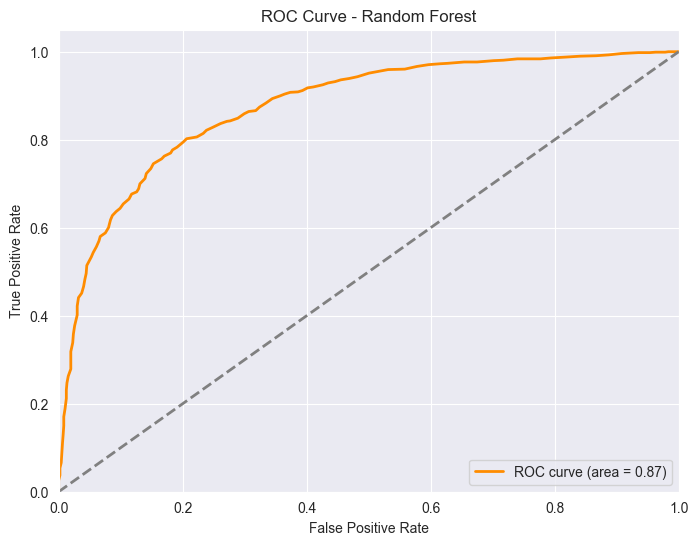

In [19]:
from sklearn.metrics import roc_curve, auc

y_score = rf_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()

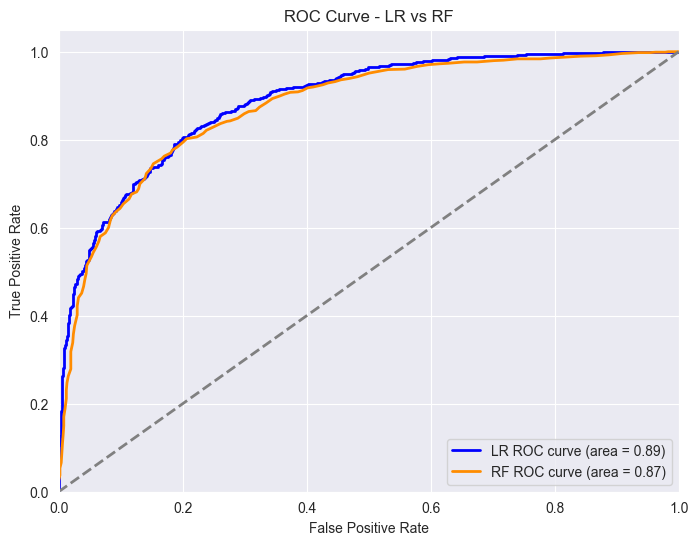

In [20]:
lr_y_score = pipe.predict_proba(X_test)[:,1]
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_y_score)
lr_roc_auc = auc(lr_fpr, lr_tpr)

rf_y_score = rf_model.predict_proba(X_test)[:,1]
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_y_score)
rf_roc_auc = auc(rf_fpr, rf_tpr)

plt.figure(figsize=(8, 6))
lw = 2
plt.plot(lr_fpr, lr_tpr, color='blue',
         lw=lw, label='LR ROC curve (area = %0.2f)' % lr_roc_auc)
plt.plot(rf_fpr, rf_tpr, color='darkorange',
         lw=lw, label='RF ROC curve (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - LR vs RF')
plt.legend(loc="lower right")
plt.show()

### Inspect the most important LR features

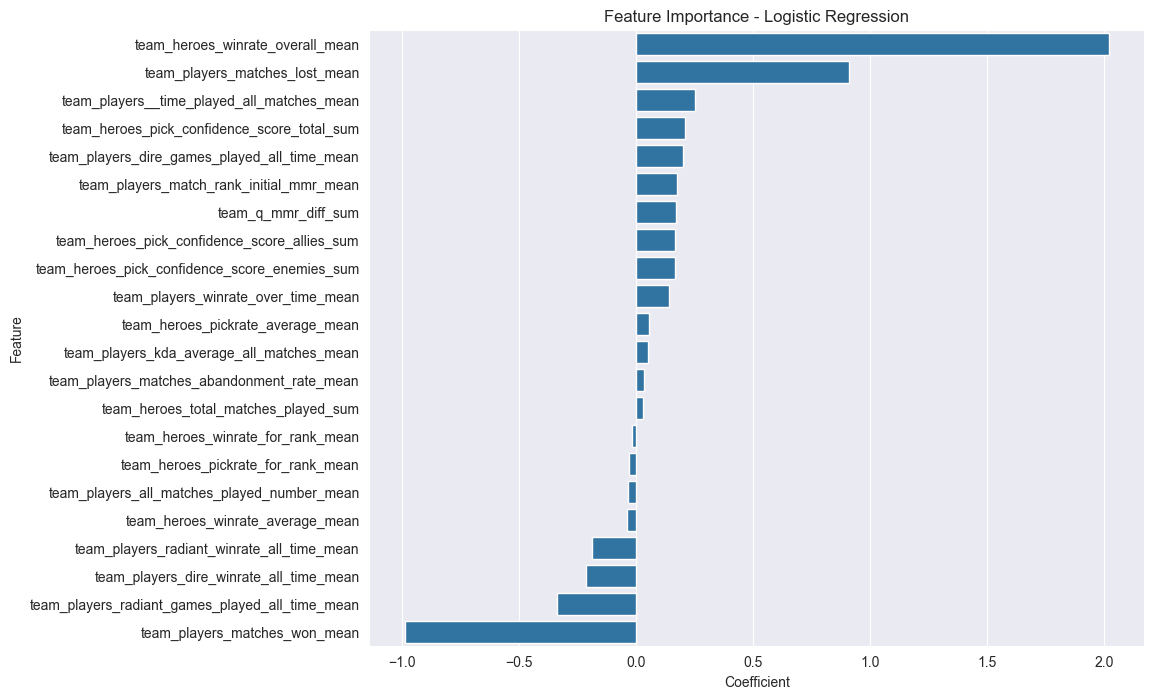

In [21]:
pipe = make_pipeline(StandardScaler(), LogisticRegression())

pipe.fit(X_train, y_train)

lr_coeffs = pipe.named_steps['logisticregression'].coef_[0]

feature_importance_lr = pd.DataFrame({'Feature': X.columns, 'Coefficient': lr_coeffs})

feature_importance_lr = feature_importance_lr.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance_lr)
plt.title('Feature Importance - Logistic Regression')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()

### Use KBest features to improve the LR model

In [22]:
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

pipe = make_pipeline(StandardScaler(), 
                     SelectKBest(k=13),
                     LogisticRegression())

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

score = pipe.score(X_test, y_test)

print(f'Accuracy: {score}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.8025575447570332
Classification Report:
              precision    recall  f1-score   support

       False       0.79      0.81      0.80       969
        True       0.81      0.79      0.80       986

    accuracy                           0.80      1955
   macro avg       0.80      0.80      0.80      1955
weighted avg       0.80      0.80      0.80      1955


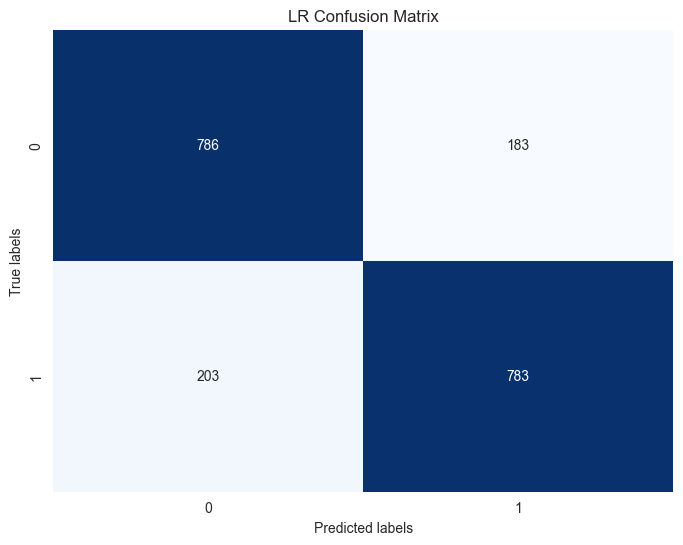

In [23]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('LR Confusion Matrix')
plt.show()

In [24]:
from joblib import dump

dump(rf_model, 'random_forest_model.joblib')
dump(pipe, 'logistic_regression_model.joblib')

['logistic_regression_model.joblib']

## Conclusion

In scope of this notebook we trained two models: RandomForest and Logistic Regression. Both models achieved good results showcasing the accuracy scores of 77+%.
We also tried calibrating the LR model via feature-selection, achieving 0.2% additional accuracy.

From my personal experience as a Dota 2 player I could say the results are more than satisfying.